In [1]:
from google.colab import drive
drive.mount('/content/drive')


ModuleNotFoundError: No module named 'google.colab'

In [ ]:
pip install nltk pandas tensorflow

In [ ]:
!pip install -U accelerate


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 2.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
!pip install -U transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 8.5 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.40.1
    Uninstalling transformers-4.40.1:
      Successfully uninstalled transformers-4.40.1


In [ ]:
!pip install -U torch


     ━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.3/779.1 MB 46.7 MB/s eta 0:00:15
ERROR: Operation cancelled by user


In [ ]:
!pip show torch torchvision torchaudio torchtext


Name: torch
Version: 2.2.1+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, torchaudio, torchdata, torchtext, torchvision
---
Name: torchvision
Version: 0.17.1+cu121
Summary: image and video datasets and models for torch deep learning
Home-page: https://github.com/pytorch/vision
Author: PyTorch Core Team
Author-email: soumith@pytorch.org
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, pillow, torch
Required-by: fastai
---
Name

In [ ]:
!pip install torch==2.2.1 torchvision==0.17.1+cu121 torchaudio==2.2.1+cu121 torchtext==0.17.1


In [ ]:
!pip install accelerate


In [ ]:
pip install transformers[torch]

In [ ]:
!pip install torch


In [ ]:
!pip list | grep transformers


transformers                     4.40.1


In [8]:
import torch
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments

import pandas as pd

In [10]:
import pandas as pd

# File directory
file_name = '/content/drive/MyDrive/NLP/Sentences_75Agree.txt'

# Loading the dataset
try:
    data = pd.read_csv(file_name, delimiter='\t', header=None, names=['text', 'label'])
    print(data.head())
except Exception as e:
    print(f"An error occurred: {e}")


An error occurred: 'utf-8' codec can't decode byte 0xf1 in position 1724: invalid continuation byte


In [ ]:
# checking the data
with open(file_name, 'r', encoding='ISO-8859-1') as file:
    for _ in range(5):
        print(file.readline())


According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .@neutral

With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .@positive

For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .@positive

In the third quarter of 2010 , net sales increased by 5.2 % to EUR 205.5 mn , and operating profit by 34.9 % to EUR 23.5 mn .@positive

Operating profit rose to EUR 13.1 mn from EUR 8.7 mn in the corresponding period in 2007 representing 7.7 % of net sales .@positive



In [ ]:
import pandas as pd
try:
    # Attempt to read the file with ISO-8859-1 encoding
    data = pd.read_csv(file_name, delimiter='\t', header=None, names=['text', 'label'], encoding='ISO-8859-1')
    print(data.head())
except Exception as e:
    print(f"An error occurred: {e}")


                                                text  label
0  According to Gran , the company has no plans t...    NaN
1  With the new production plant the company woul...    NaN
2  For the last quarter of 2010 , Componenta 's n...    NaN
3  In the third quarter of 2010 , net sales incre...    NaN
4  Operating profit rose to EUR 13.1 mn from EUR ...    NaN


In [ ]:
import pandas as pd


# Attempt to read the file with the correct delimiter
try:
    # Using '@' as the delimiter to correctly split the text and the labels
    data = pd.read_csv(file_name, delimiter='@', header=None, names=['text', 'label'], encoding='ISO-8859-1')
    print("Data loaded successfully!")
    print(data.head())
except Exception as e:
    print(f"An error occurred: {e}")


Data loaded successfully!
                                                text     label
0  According to Gran , the company has no plans t...   neutral
1  With the new production plant the company woul...  positive
2  For the last quarter of 2010 , Componenta 's n...  positive
3  In the third quarter of 2010 , net sales incre...  positive
4  Operating profit rose to EUR 13.1 mn from EUR ...  positive


In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Make sure to download the stopwords from NLTK
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
import pandas as pd
import re

# load and preprocess data
def load_data(file_path):
    data = pd.read_csv(file_path, delimiter='@', header=None, names=['text', 'label'], encoding='ISO-8859-1')
    data['text'] = data['text'].str.strip().str.lower()
    data['label'] = data['label'].str.strip()
    label_dict = {'positive': 0, 'neutral': 1, 'negative': 2}
    data['label'] = data['label'].map(label_dict)
    return data

# remove punctuation and excessive whitespace
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text

# Load the data
data = load_data(file_name)

# Apply cleaning function
data['text'] = data['text'].apply(clean_text)
print(data.head())


                                                text  label
0  according to gran the company has no plans to ...      1
1  with the new production plant the company woul...      0
2  for the last quarter of 2010 componenta s net ...      0
3  in the third quarter of 2010 net sales increas...      0
4  operating profit rose to eur 131 mn from eur 8...      0


In [12]:
# Splitting data with reset index
train_texts, test_texts, train_labels, test_labels = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=0.25, random_state=42)

# Reset indices to avoid KeyError during model training
train_texts.reset_index(drop=True, inplace=True)
train_labels.reset_index(drop=True, inplace=True)
val_texts.reset_index(drop=True, inplace=True)
val_labels.reset_index(drop=True, inplace=True)
test_texts.reset_index(drop=True, inplace=True)
test_labels.reset_index(drop=True, inplace=True)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Load your dataset (assuming it's already loaded into a DataFrame `data`)
# data = pd.read_csv('path_to_your_data.csv')

# Split the data into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)


In [ ]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')

# Fit and transform the training data to create TF-IDF vectors
train_vectors = tfidf_vectorizer.fit_transform(train_texts)

# Transform the test data into the same vector space
test_vectors = tfidf_vectorizer.transform(test_texts)


In [ ]:
# Initialize the Support Vector Classifier
svm_classifier = SVC(kernel='linear')

# Train the classifier
svm_classifier.fit(train_vectors, train_labels)


SVC(kernel='linear')

              precision    recall  f1-score   support

    positive       0.83      0.62      0.71       186
     neutral       0.84      0.96      0.90       433
    negative       0.75      0.62      0.68        72

    accuracy                           0.83       691
   macro avg       0.81      0.73      0.76       691
weighted avg       0.83      0.83      0.82       691



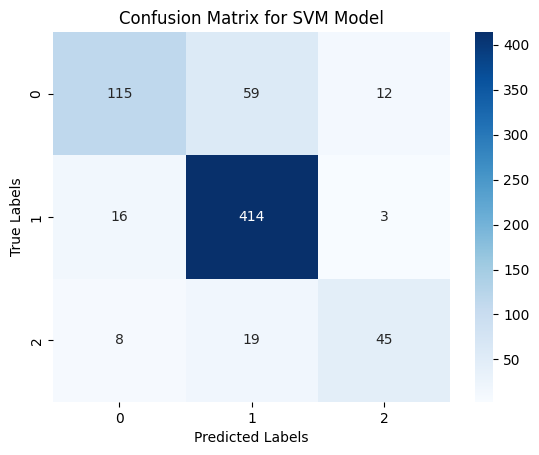

In [ ]:
# Predict the labels for the test set
predictions = svm_classifier.predict(test_vectors)

# Print the classification report
print(classification_report(test_labels, predictions, target_names=['positive', 'neutral', 'negative']))

# Generate and plot the confusion matrix
cm = confusion_matrix(test_labels, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM Model')
plt.show()


In [6]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import nltk
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [14]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
# Tokenize texts
texts = data['text'].apply(lambda x: word_tokenize(x))
lengths = texts.apply(len)
print("Maximum sentence length:", max(lengths))
print("Minimum sentence length:", min(lengths))

Maximum sentence length: 52
Minimum sentence length: 1


In [16]:
# Splitting data
train_texts, test_texts, train_labels, test_labels = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=0.25, random_state=42)

# Reset indices to avoid KeyError during model training
train_texts.reset_index(drop=True, inplace=True)
train_labels.reset_index(drop=True, inplace=True)
val_texts.reset_index(drop=True, inplace=True)
val_labels.reset_index(drop=True, inplace=True)
test_texts.reset_index(drop=True, inplace=True)
test_labels.reset_index(drop=True, inplace=True)


In [17]:
# Tokenization
tokenizer = Tokenizer(num_words=10000)  # Adjust num_words according to the dataset size
tokenizer.fit_on_texts(train_texts)

train_sequences = tokenizer.texts_to_sequences(train_texts)
val_sequences = tokenizer.texts_to_sequences(val_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)


In [19]:
# Padding sequences
max_len = 100  # Choose an appropriate value based on your dataset
X_train = pad_sequences(train_sequences, maxlen=max_len)
X_val = pad_sequences(val_sequences, maxlen=max_len)
X_test = pad_sequences(test_sequences, maxlen=max_len)

In [20]:
# Convert labels to categorical
num_classes = 3  # Positive, Neutral, Negative
y_train = to_categorical(train_labels, num_classes=num_classes)
y_val = to_categorical(val_labels, num_classes=num_classes)
y_test = to_categorical(test_labels, num_classes=num_classes)

In [21]:
# Building the RNN model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=64, input_length=max_len))
model.add(SimpleRNN(100, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [22]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [23]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               16500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 656803 (2.51 MB)
Trainable params: 656803 (2.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# Training the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
65/65 [==============================] - 10s 98ms/step - loss: 0.9289 - accuracy: 0.6026 - val_loss: 0.8693 - val_accuracy: 0.6165
Epoch 2/10
65/65 [==============================] - 8s 116ms/step - loss: 0.6211 - accuracy: 0.7537 - val_loss: 0.7770 - val_accuracy: 0.6700
Epoch 3/10
65/65 [==============================] - 6s 96ms/step - loss: 0.2700 - accuracy: 0.9242 - val_loss: 0.7472 - val_accuracy: 0.6961
Epoch 4/10
65/65 [==============================] - 3s 44ms/step - loss: 0.0786 - accuracy: 0.9874 - val_loss: 0.8265 - val_accuracy: 0.6758
Epoch 5/10
65/65 [==============================] - 3s 45ms/step - loss: 0.0274 - accuracy: 0.9966 - val_loss: 0.8920 - val_accuracy: 0.6874
Epoch 6/10
65/65 [==============================] - 7s 108ms/step - loss: 0.0103 - accuracy: 0.9995 - val_loss: 0.9717 - val_accuracy: 0.6918
Epoch 7/10
65/65 [==============================] - 3s 47ms/step - loss: 0.0083 - accuracy: 0.9990 - val_loss: 1.0006 - val_accuracy: 0.6845
Epoch 8/10

In [26]:
# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

22/22 [==============================] - 1s 29ms/step - loss: 0.9613 - accuracy: 0.7120
Test Loss: 0.9612932205200195
Test Accuracy: 0.7120115756988525


In [27]:
# Save the tokenizer and model
model.save('sentiment_rnn_model.h5')
tokenizer_json = tokenizer.to_json()
with open('tokenizer.json', 'w') as file:
    file.write(tokenizer_json)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
def tokenize_data(tokenizer, texts):
    return tokenizer(texts.tolist(), padding=True, truncation=True, max_length=128, return_tensors="pt")

train_encodings = tokenize_data(bert_tokenizer, train_texts)
val_encodings = tokenize_data(bert_tokenizer, val_texts)
test_encodings = tokenize_data(bert_tokenizer, test_texts)

In [ ]:
# Define Dataset class for BERT
class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)


In [ ]:
# Initialize datasets
train_dataset_bert = SentimentDataset(train_encodings, train_labels)
val_dataset_bert = SentimentDataset(val_encodings, val_labels)
test_dataset_bert = SentimentDataset(test_encodings, test_labels)


In [ ]:
# Define training arguments for BERT model
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end=True,
    metric_for_best_model='eval_loss'
)

In [ ]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

# Initialize BERT model for sequence classification
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Assume training_args is configured as previously mentioned
bert_trainer = Trainer(
    model=bert_model,
    args=training_args,
    train_dataset=train_dataset_bert,
    eval_dataset=val_dataset_bert
)

# Train the BERT model
bert_trainer.train()

# Evaluate the BERT model on the test dataset
bert_results = bert_trainer.evaluate(test_dataset_bert)
print("BERT Evaluation Results:", bert_results)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,No log,0.295062
2,0.523000,0.328676
3,0.523000,0.352166


BERT Evaluation Results: {'eval_loss': 0.2767208516597748, 'eval_runtime': 261.6986, 'eval_samples_per_second': 2.64, 'eval_steps_per_second': 0.168, 'epoch': 3.0}


In [ ]:
# Initialize and train the BERT model
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
bert_trainer = Trainer(
    model=bert_model,
    args=training_args,
    train_dataset=train_dataset_bert,
    eval_dataset=val_dataset_bert
)

# Train the BERT model
bert_trainer.train()

# Evaluate the BERT model on the test dataset
bert_results = bert_trainer.evaluate(test_dataset_bert)
print("BERT Evaluation Results:", bert_results)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,No log,0.329906
2,0.496700,0.316690
3,0.496700,0.343103


BERT Evaluation Results: {'eval_loss': 0.3256494998931885, 'eval_runtime': 148.7363, 'eval_samples_per_second': 4.646, 'eval_steps_per_second': 0.296, 'epoch': 3.0}


In [ ]:
import numpy as np
# Make predictions on the test set
predictions_output = bert_trainer.predict(test_dataset_bert)
predictions = np.argmax(predictions_output.predictions, axis=1)


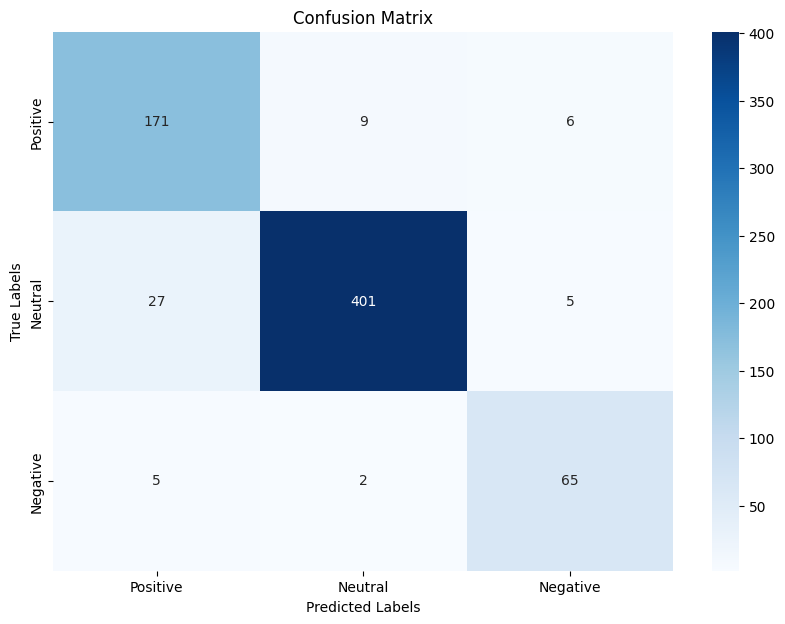

              precision    recall  f1-score   support

    Positive       0.84      0.92      0.88       186
     Neutral       0.97      0.93      0.95       433
    Negative       0.86      0.90      0.88        72

    accuracy                           0.92       691
   macro avg       0.89      0.92      0.90       691
weighted avg       0.93      0.92      0.92       691

BERT Evaluation Results: {'eval_loss': 0.3256494998931885, 'eval_runtime': 148.7363, 'eval_samples_per_second': 4.646, 'eval_steps_per_second': 0.296, 'epoch': 3.0}


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming the 'bert_trainer' and 'test_dataset_bert' are already defined and available from previous steps

# Make predictions on the test set
predictions_output = bert_trainer.predict(test_dataset_bert)
predictions = np.argmax(predictions_output.predictions, axis=1)

# True labels are assumed to be part of the test_dataset
true_labels = test_dataset_bert.labels

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predictions)
df_cm = pd.DataFrame(cm, index=['Positive', 'Neutral', 'Negative'], columns=['Positive', 'Neutral', 'Negative'])

# Plotting confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print(classification_report(true_labels, predictions, target_names=['Positive', 'Neutral', 'Negative']))

# Print the model's evaluation results
print("BERT Evaluation Results:", bert_results)


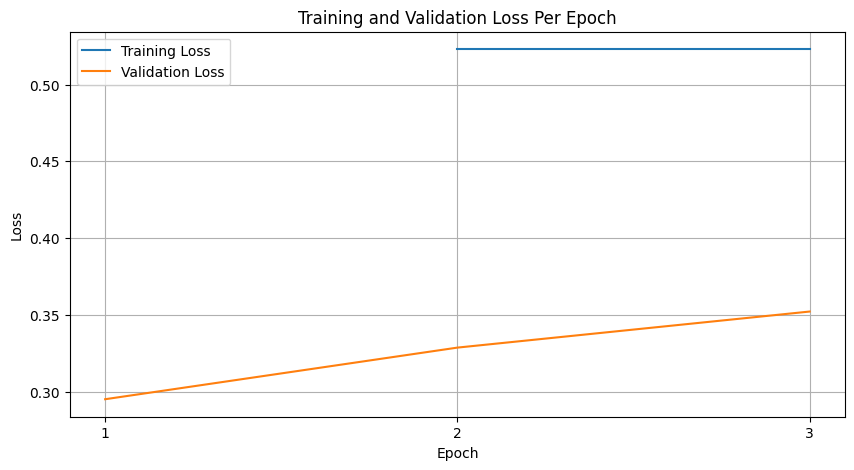

In [ ]:
import matplotlib.pyplot as plt

# Training and validation losses per epoch
training_losses = [None, 0.523000, 0.523000]  # None for the first epoch where no log is available
validation_losses = [0.295062, 0.328676, 0.352166]
epochs = [1, 2, 3]

plt.figure(figsize=(10, 5))
plt.plot(epochs, training_losses, label='Training Loss')
plt.plot(epochs, validation_losses, label='Validation Loss')
plt.title('Training and Validation Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

def tokenize_data(texts):
    return tokenizer(texts.tolist(), padding=True, truncation=True, max_length=128, return_tensors="pt")

train_encodings = tokenize_data(train_texts)
val_encodings = tokenize_data(val_texts)
test_encodings = tokenize_data(test_texts)


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [ ]:
class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.data.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = SentimentDataset(train_encodings, train_labels)
val_dataset = SentimentDataset(val_encodings, val_labels)
test_dataset = SentimentDataset(test_encodings, test_labels)


In [ ]:
print(f"Training set length: {len(train_dataset)}")
print(f"Validation set length: {len(val_dataset)}")
print(f"Test set length: {len(test_dataset)}")


Training set length: 2071
Validation set length: 691
Test set length: 691


In [ ]:
print(f"Maximum index in training data: {max(train_labels.index)}")
print(f"Maximum index in validation data: {max(val_labels.index)}")


Maximum index in training data: 2070
Maximum index in validation data: 690


In [ ]:
# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    evaluation_strategy='epoch',  # Evaluate at the end of each epoch
    save_strategy='epoch',        # Save at the end of each epoch
    load_best_model_at_end=True,  # Load the best model at the end based on the metric
    metric_for_best_model='loss'  # Choose the metric for the best model; common choices: 'loss', 'accuracy'
)

In [ ]:
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

trainer.train()
results = trainer.evaluate(test_dataset)
print(results)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,No log,0.748695
2,0.566400,0.429904
3,0.566400,0.300408


{'eval_loss': 0.2897862493991852, 'eval_runtime': 160.3105, 'eval_samples_per_second': 4.31, 'eval_steps_per_second': 0.274, 'epoch': 3.0}


In [ ]:
# Get predictions
predictions_output = trainer.predict(test_dataset)
predictions = predictions_output.predictions.argmax(-1)

# Optionally, review some specific predictions
for i in range(10):  # Just checking the first 10 for example
    print(f"Text: {test_texts.iloc[i]}")
    print(f"True label: {test_labels.iloc[i]}, Predicted label: {predictions[i]}")


Text: Turnover surged to EUR61 .8 m from EUR47 .6 m due to increasing service demand , especially in the third quarter , and the overall growth of its business .
True label: 0, Predicted label: 0
Text: In June it sold a 30 percent stake to Nordstjernan , and the investment group has now taken up the option to acquire EQT 's remaining shares .
True label: 1, Predicted label: 1
Text: Aspo 's Group structure and business operations are continually developed without any predefined schedules .
True label: 1, Predicted label: 1
Text: The device can also be used for theft protection and positioning of vehicles , boats and other assets .
True label: 1, Predicted label: 1
Text: Of the price , Kesko 's share is 10 mln euro $ 15.5 mln and it will recognize a gain of 4.0 mln euro $ 6.2 mln on the disposal which will be included in the result for the second quarter of 2008 .
True label: 0, Predicted label: 0
Text: The address location is provided to a local controller , preferably by wireless trans

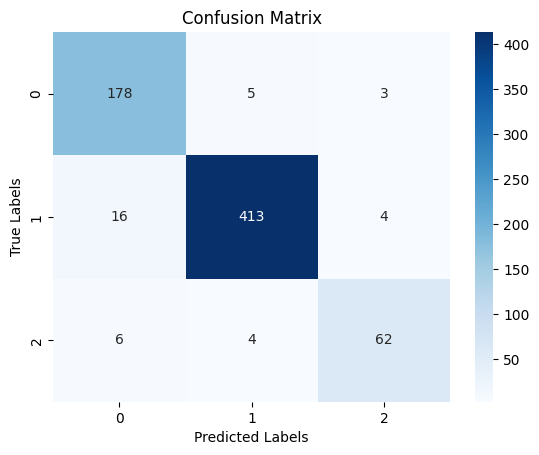

              precision    recall  f1-score   support

    positive       0.89      0.96      0.92       186
     neutral       0.98      0.95      0.97       433
    negative       0.90      0.86      0.88        72

    accuracy                           0.95       691
   macro avg       0.92      0.92      0.92       691
weighted avg       0.95      0.95      0.95       691



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(test_labels, predictions, target_names=['positive', 'neutral', 'negative']))


In [ ]:
model_path = "path_to_save_model"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)


('path_to_save_model/tokenizer_config.json',
 'path_to_save_model/special_tokens_map.json',
 'path_to_save_model/vocab.json',
 'path_to_save_model/merges.txt',
 'path_to_save_model/added_tokens.json')